### Faculty of Engineering, Environment and Computing EEC Module Title: Machine Learning and Big Data  


In [1]:
#Importing libraries

import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import plotly.express as ex
import plotly.graph_objects as go
from collections import Counter
from wordcloud import WordCloud, STOPWORDS
import folium
import geopandas as gpd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings
warnings.simplefilter(action='ignore')
from sklearn.linear_model import LinearRegression

### a)Reading the dataset

In [2]:
#loading data

data=pd.read_csv("Airbnb_Open_Data.csv")

In [3]:
#Reading data

data.head()

id                                              NAME      host id  \
0  1001254                Clean & quiet apt home by the park  80014485718   
1  1002102                             Skylit Midtown Castle  52335172823   
2  1002403               THE VILLAGE OF HARLEM....NEW YORK !  78829239556   
3  1002755                                               NaN  85098326012   
4  1003689  Entire Apt: Spacious Studio/Loft by central park  92037596077   

  host_identity_verified host name neighbourhood group neighbourhood  \
0            unconfirmed  Madaline            Brooklyn    Kensington   
1               verified     Jenna           Manhattan       Midtown   
2                    NaN     Elise           Manhattan        Harlem   
3            unconfirmed     Garry            Brooklyn  Clinton Hill   
4               verified    Lyndon           Manhattan   East Harlem   

        lat      long        country  ... service fee minimum nights  \
0  40.64749 -73.97237  United States  ...       $193            10.0   
1  40.75362 -73.98377  United States  ...        $28            30.0   
2  40.80902 -73.94190  United States  ...       $124             3.0   
3  40.68514 -73.95976  United States  ...        $74            30.0   
4  40.79851 -73.94399  United States  ...        $41            10.0   

  number of reviews last review  reviews per month review rate number  \
0               9.0  10/19/2021               0.21                4.0   
1              45.0   5/21/2022               0.38                4.0   
2               0.0         NaN                NaN                5.0   
3             270.0    7/5/2019               4.64                4.0   
4               9.0  11/19/2018               0.10                3.0   

  calculated host listings count  availability 365  \
0                            6.0             286.0   
1                            2.0             228.0   
2                            1.0             352.0   
3                            1.0             322.0   
4                            1.0             289.0   

                                         house_rules license  
0  Clean up and treat the home the way you'd like...     NaN  
1  Pet friendly but please confirm with me if the...     NaN  
2  I encourage you to use my kitchen, cooking and...     NaN  
3                                                NaN     NaN  
4  Please no smoking in the house, porch or on th...     NaN  

[5 rows x 26 columns]

In [4]:
#Checking the size of data

data.shape

(102599, 26)

### b) Cleaning the dataset

In [5]:
#Checking the null values in dataset

data.isnull().sum()

id                                     0
NAME                                 250
host id                                0
host_identity_verified               289
host name                            406
neighbourhood group                   29
neighbourhood                         16
lat                                    8
long                                   8
country                              532
country code                         131
instant_bookable                     105
cancellation_policy                   76
room type                              0
Construction year                    214
price                                247
service fee                          273
minimum nights                       409
number of reviews                    183
last review                        15893
reviews per month                  15879
review rate number                   326
calculated host listings count       319
availability 365                     448
house_rules     

In [6]:
# Drop null values from columns with missing values
columns_with_null_values = ['NAME', 'host_identity_verified', 'host name', 'neighbourhood group', 'neighbourhood', 
                            'lat', 'long', 'country', 'country code', 'instant_bookable', 'cancellation_policy', 
                            'Construction year', 'price', 'service fee', 'minimum nights', 'number of reviews', 
                            'last review', 'reviews per month', 'review rate number', 
                            'calculated host listings count', 'availability 365']

data = data.dropna(subset=columns_with_null_values)


In [7]:
data.fillna(data.mean(), inplace=True)

In [8]:
data.isnull().sum()

id                                    0
NAME                                  0
host id                               0
host_identity_verified                0
host name                             0
neighbourhood group                   0
neighbourhood                         0
lat                                   0
long                                  0
country                               0
country code                          0
instant_bookable                      0
cancellation_policy                   0
room type                             0
Construction year                     0
price                                 0
service fee                           0
minimum nights                        0
number of reviews                     0
last review                           0
reviews per month                     0
review rate number                    0
calculated host listings count        0
availability 365                      0
house_rules                       44251


In [9]:
data = data.drop(['house_rules', 'license'], axis=1)

In [10]:
data.isnull().sum()

id                                0
NAME                              0
host id                           0
host_identity_verified            0
host name                         0
neighbourhood group               0
neighbourhood                     0
lat                               0
long                              0
country                           0
country code                      0
instant_bookable                  0
cancellation_policy               0
room type                         0
Construction year                 0
price                             0
service fee                       0
minimum nights                    0
number of reviews                 0
last review                       0
reviews per month                 0
review rate number                0
calculated host listings count    0
availability 365                  0
dtype: int64

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83878 entries, 0 to 102597
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              83878 non-null  int64  
 1   NAME                            83878 non-null  object 
 2   host id                         83878 non-null  int64  
 3   host_identity_verified          83878 non-null  object 
 4   host name                       83878 non-null  object 
 5   neighbourhood group             83878 non-null  object 
 6   neighbourhood                   83878 non-null  object 
 7   lat                             83878 non-null  float64
 8   long                            83878 non-null  float64
 9   country                         83878 non-null  object 
 10  country code                    83878 non-null  object 
 11  instant_bookable                83878 non-null  bool   
 12  cancellation_policy            

In [12]:
data.describe()

id       host id           lat          long  \
count  8.387800e+04  8.387800e+04  83878.000000  83878.000000   
mean   2.953848e+07  4.917159e+10     40.727347    -73.948483   
std    1.620176e+07  2.853714e+10      0.056332      0.050373   
min    1.001254e+06  1.236005e+08     40.504560    -74.249840   
25%    1.542148e+07  2.441744e+10     40.687660    -73.982100   
50%    3.072640e+07  4.900923e+10     40.721310    -73.953710   
75%    4.323834e+07  7.384243e+10     40.762580    -73.930810   
max    5.735803e+07  9.876313e+10     40.916970    -73.705220   

       Construction year  minimum nights  number of reviews  \
count       83878.000000    83878.000000       83878.000000   
mean         2012.487446        7.417261          32.227044   
std             5.760245       28.041322          51.888326   
min          2003.000000     -365.000000           1.000000   
25%          2007.000000        2.000000           3.000000   
50%          2012.000000        3.000000          11.000000   
75%          2017.000000        5.000000          38.000000   
max          2022.000000     5645.000000        1024.000000   

       reviews per month  review rate number  calculated host listings count  \
count       83878.000000         83878.00000                    83878.000000   
mean            1.376112             3.27943                        7.030044   
std             1.749524             1.28311                       29.501556   
min             0.010000             1.00000                        1.000000   
25%             0.220000             2.00000                        1.000000   
50%             0.740000             3.00000                        1.000000   
75%             2.010000             4.00000                        2.000000   
max            90.000000             5.00000                      332.000000   

       availability 365  
count      83878.000000  
mean         141.861990  
std          133.944313  
min          -10.000000  
25%            6.000000  
50%          101.000000  
75%          266.000000  
max         3677.000000

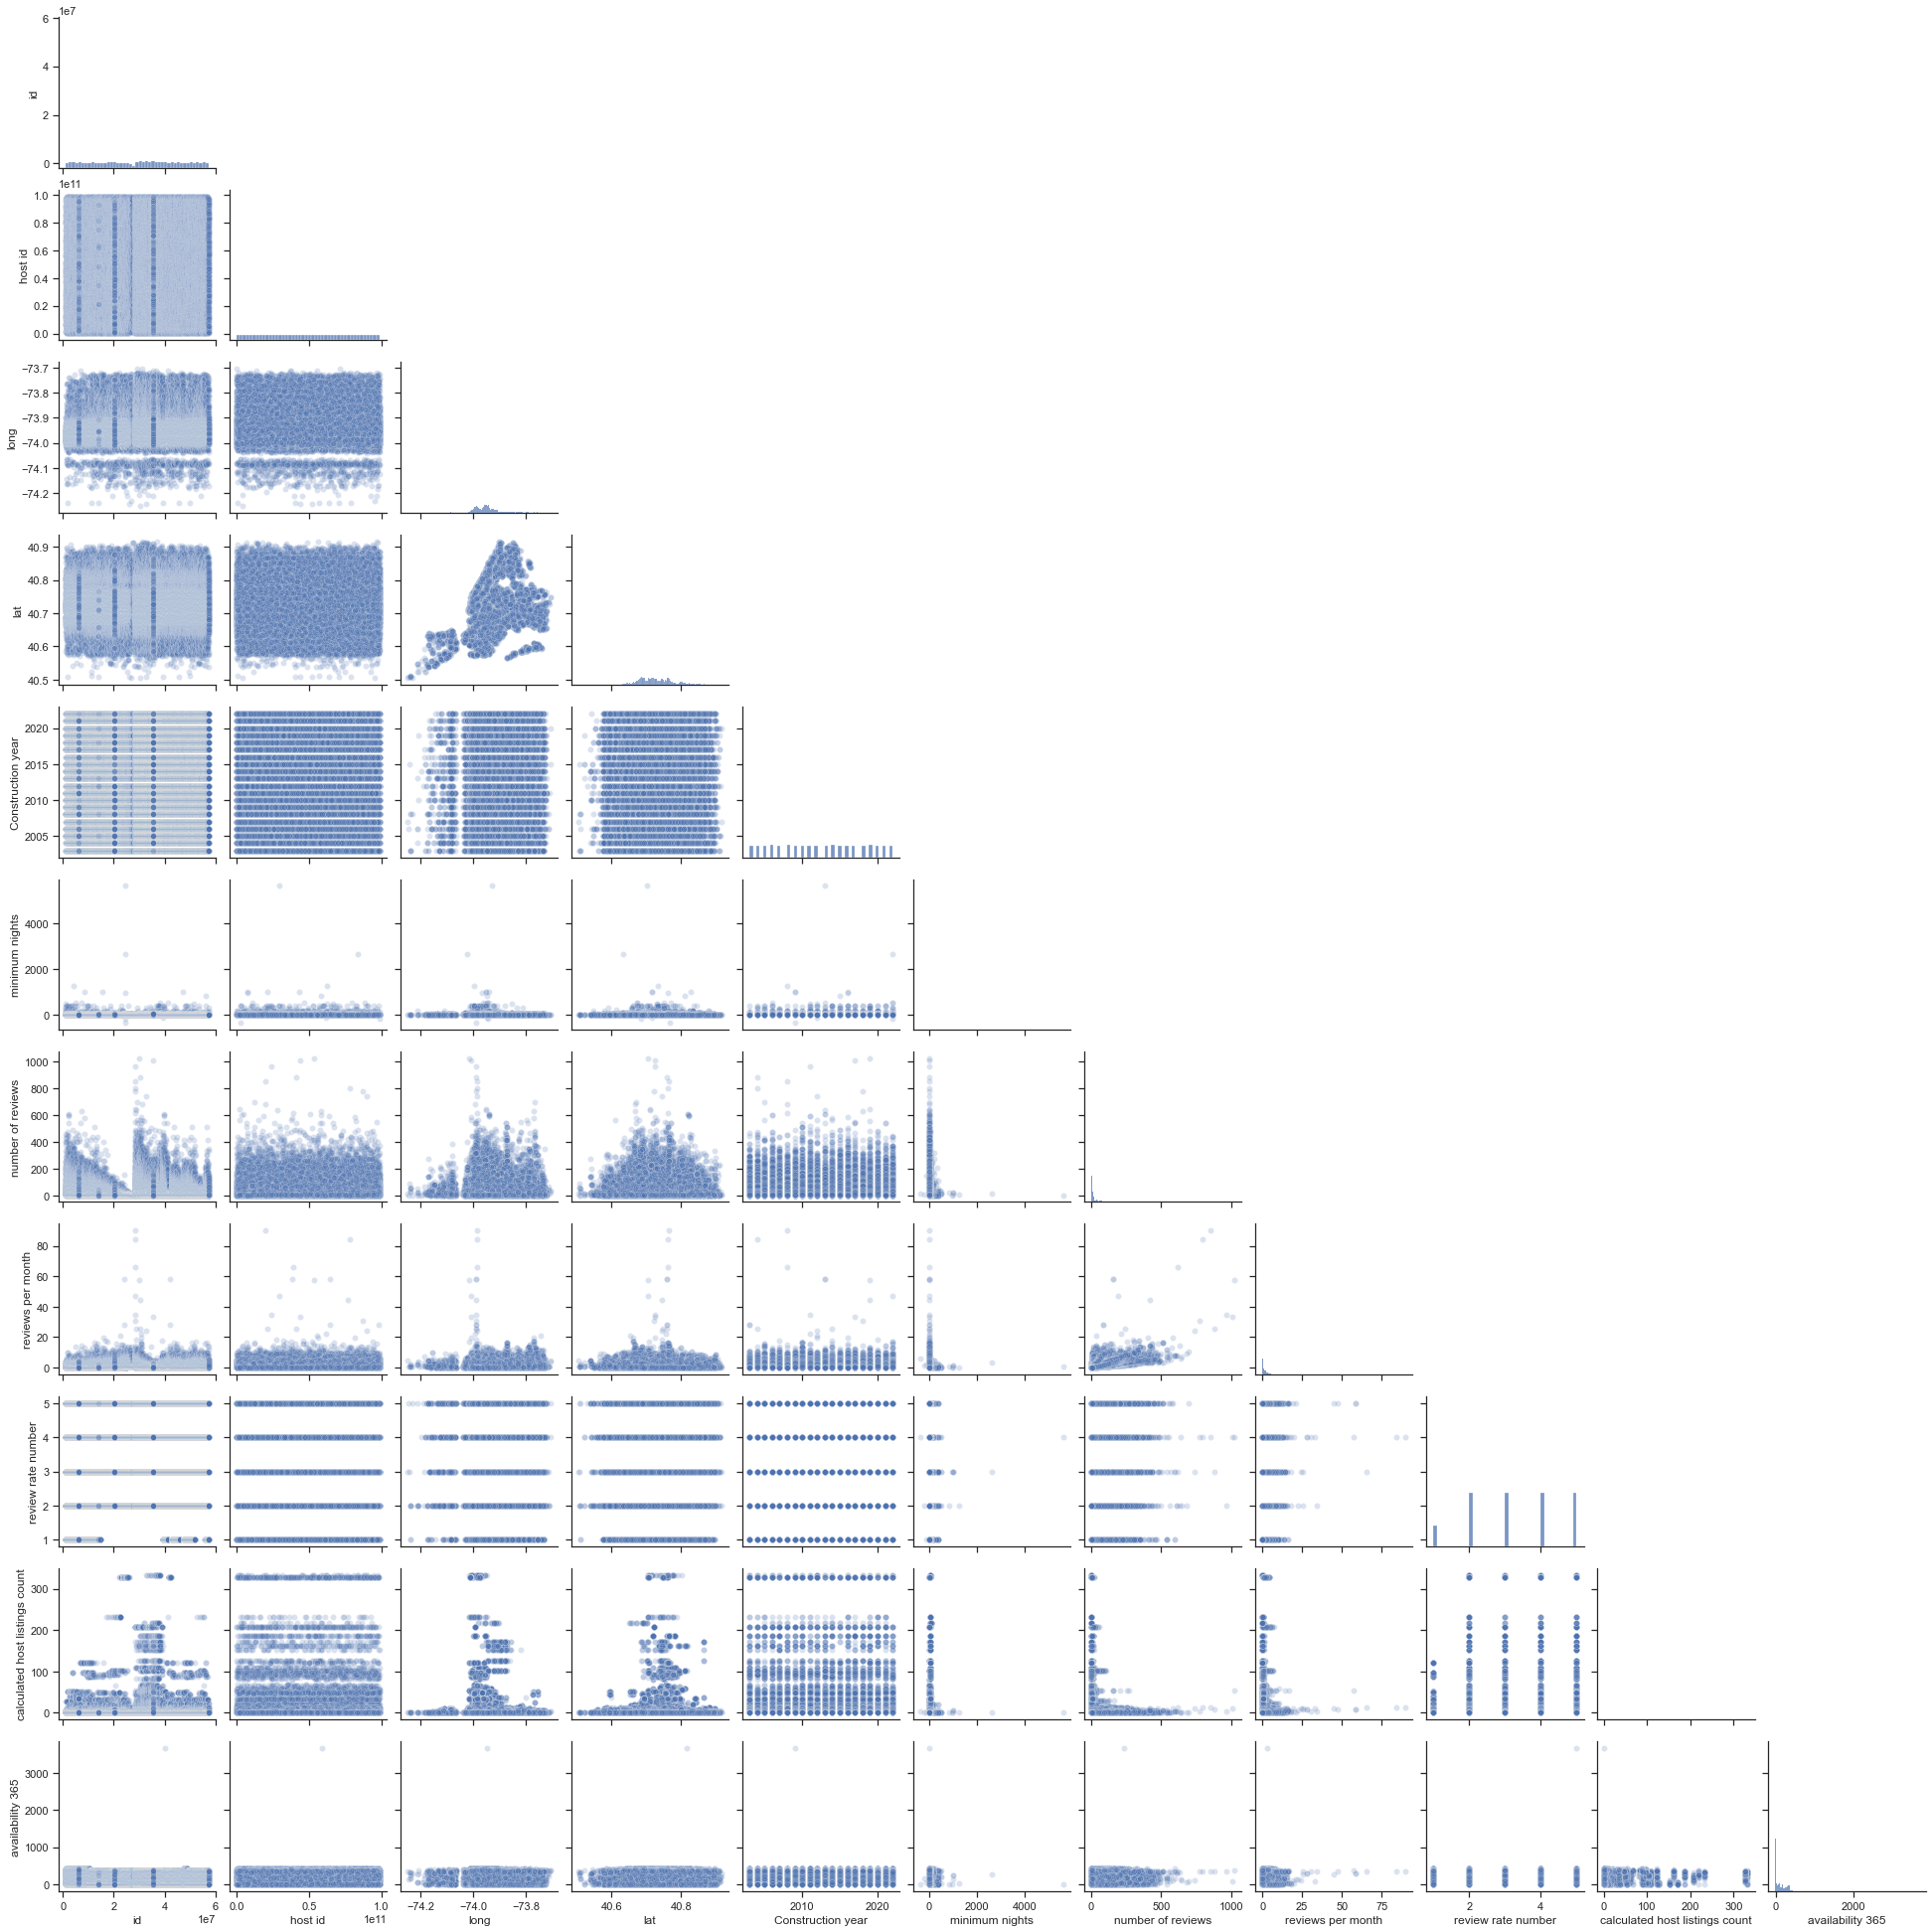

In [13]:
sns.set(style="ticks")

# Select only numerical columns for the correlation matrix
numeric_cols = ['id','host id', 'long','lat','Construction year','minimum nights','number of reviews','reviews per month','review rate number', 'price', 
                'calculated host listings count', 'availability 365']

# Create the correlation matrix
corr = data[numeric_cols].corr()

# Plot the matrix
g = sns.pairplot(data[numeric_cols], diag_kind='hist', plot_kws={'alpha':0.2}, height=2.5)
for i, j in zip(*plt.np.triu_indices_from(g.axes, 1)):
    g.axes[i, j].set_visible(False)
plt.show()

<AxesSubplot: >

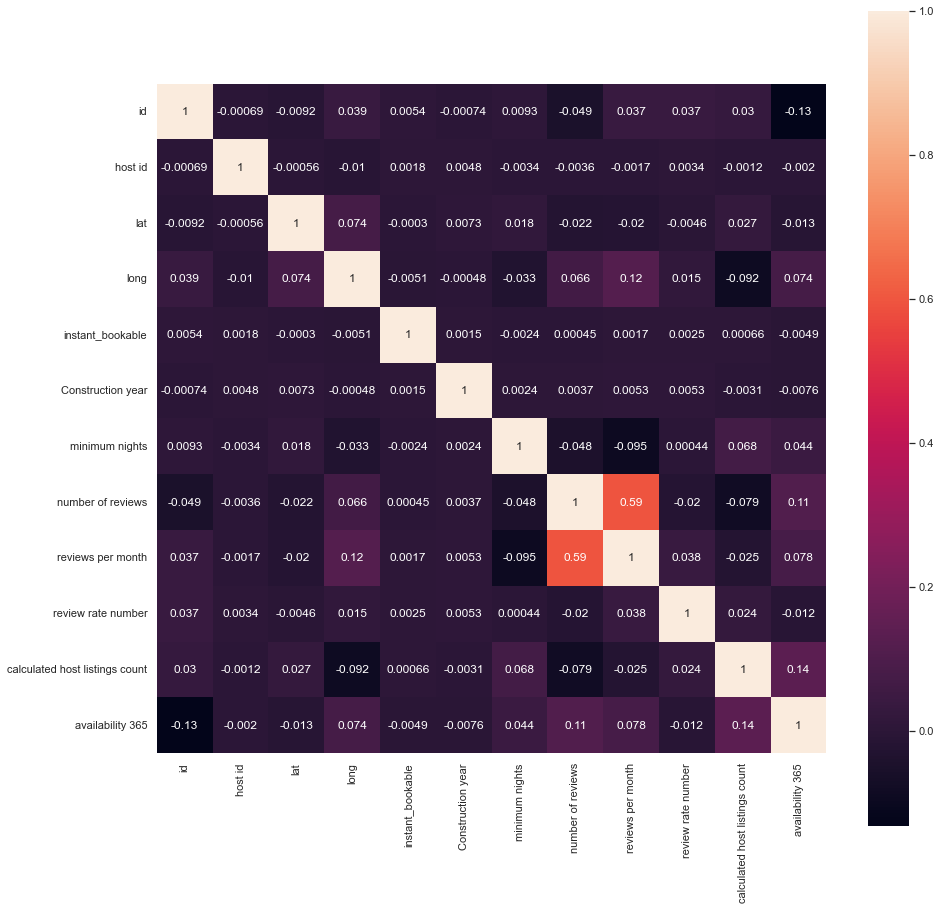

In [14]:
#heatmap of correlation
sns.set(rc={"figure.figsize":(15, 15)})
sns.heatmap(data.corr(), annot=True, square=True)

In [15]:
data.shape


(83878, 24)

In [16]:
# Convert 'last review' column to datetime type
data['last review'] = pd.to_datetime(data['last review'])

In [17]:
data.price.unique

<bound method Series.unique of 0           $966 
1           $142 
4           $204 
5           $577 
7         $1,060 
           ...   
102588      $618 
102591    $1,139 
102593    $1,099 
102595      $837 
102597      $546 
Name: price, Length: 83878, dtype: object>

In [18]:
data['price'] = data['price'].astype(str).str.replace('$', '').str.replace(',', '').astype(float)
data['service fee'] = data['service fee'].astype(str).str.replace('$', '').str.replace(',', '').astype(float)


In [19]:
data.price.unique

<bound method Series.unique of 0          966.0
1          142.0
4          204.0
5          577.0
7         1060.0
           ...  
102588     618.0
102591    1139.0
102593    1099.0
102595     837.0
102597     546.0
Name: price, Length: 83878, dtype: float64>

### c) Visualization of data

In [20]:
data['host_identity_verified'].value_counts()

verified       41940
unconfirmed    41938
Name: host_identity_verified, dtype: int64

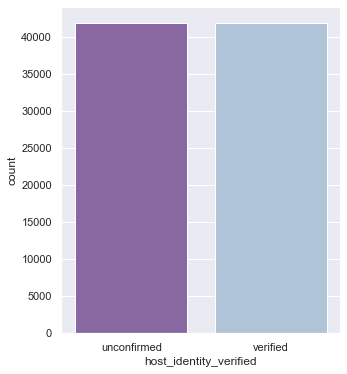

In [21]:

plt.figure(figsize=(5,6))
plt.xlabel('host_identity_verified')
sns.countplot(data=data, x='host_identity_verified', palette='BuPu_r')
plt.show()


In [22]:
lat_mean = data['lat'].mean()
long_mean = data['long'].mean()
area_lat = data['lat'].groupby(data['neighbourhood group']).mean()
area_long = data['long'].groupby(data['neighbourhood group']).mean()
area_lat_long= pd.concat([area_lat,area_long],axis=1)
area_lat_long = area_lat_long.values.tolist()

In [23]:
map = folium.Map(
                  # Center the map here
                  location=[lat_mean,long_mean],
                  zoom_start = 10
                )  
for point in range(0, len(area_lat_long)):
  _=folium.Marker(
                      area_lat_long[point],
                      popup = area_lat_long[point]
                      ).add_to(map)
map

In [24]:
top_10_reviewed_neighbourhoods = data['neighbourhood'].value_counts().head(10)
print(top_10_reviewed_neighbourhoods)


Bedford-Stuyvesant    6791
Williamsburg          6365
Harlem                4577
Bushwick              4011
Hell's Kitchen        3202
Upper West Side       3013
Upper East Side       2954
East Village          2806
Crown Heights         2710
Midtown               2438
Name: neighbourhood, dtype: int64


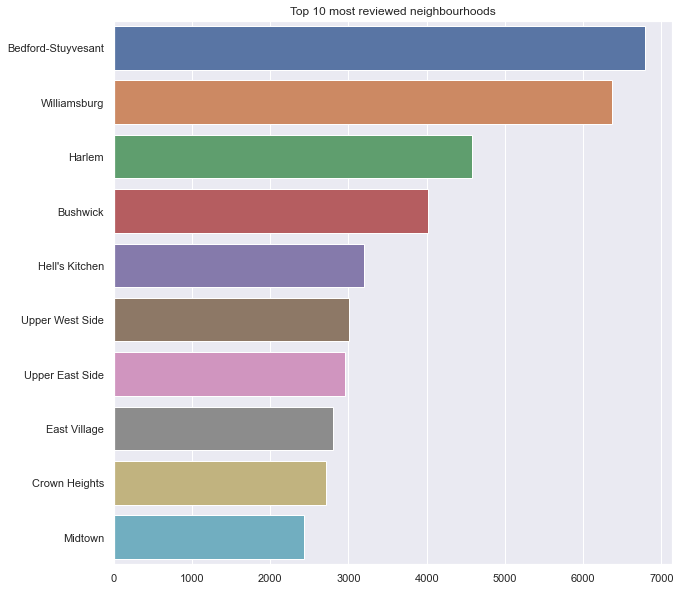

In [25]:
plt.figure(figsize=(10,10))
plt.title("Top 10 most reviewed neighbourhoods")
sns.barplot(x=top_10_reviewed_neighbourhoods.values,y=top_10_reviewed_neighbourhoods.index)
plt.show()

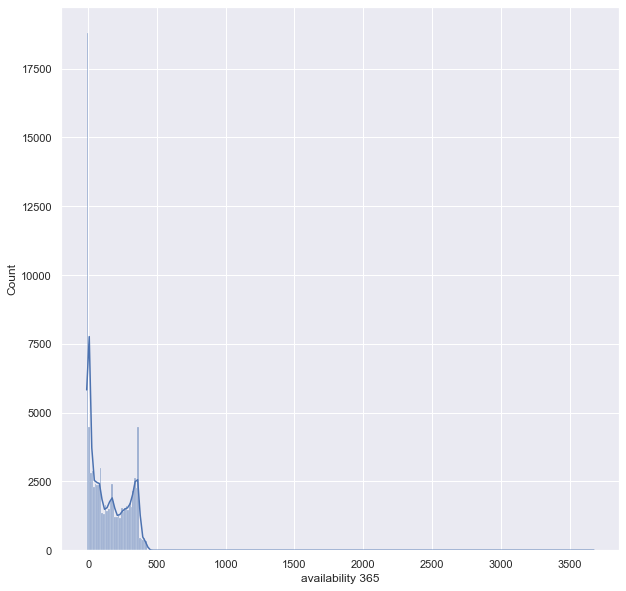

In [26]:
plt.figure(figsize=(10,10))
sns.histplot(data=data, x='availability 365', kde=True)
plt.show()


In [27]:
availability_per_neighbourhood_group = data.groupby('neighbourhood group')['availability 365'].mean()
fig = px.bar(availability_per_neighbourhood_group,
            x=availability_per_neighbourhood_group.index,
            y=availability_per_neighbourhood_group.values,
            labels={'x': 'Neighbourhood group', 'y': 'Average availability'},
            text=[str(round(i)) for i in availability_per_neighbourhood_group.values],
            title='Average availability per neighbourhood group',
            color_discrete_sequence=px.colors.sequential.deep,
            template='plotly_dark'
)

fig.update_layout(font=dict(size=20, color='white', family='Avenir'))

fig.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [28]:
neighborhood_ratings = data.groupby(['neighbourhood'])['review rate number'].mean().nlargest(24)
print(neighborhood_ratings)

neighbourhood
Bull's Head        4.500000
Glen Oaks          4.500000
Co-op City         4.400000
Gerritsen Beach    4.333333
Little Neck        4.333333
Huguenot           4.111111
Randall Manor      4.026316
New Dorp           4.000000
Silver Lake        4.000000
Todt Hill          4.000000
West Farms         4.000000
Rosebank           3.928571
Oakwood            3.923077
Mount Eden         3.875000
Clifton            3.857143
New Dorp Beach     3.857143
Unionport          3.842105
Morrisania         3.818182
Eltingville        3.800000
Shore Acres        3.800000
Mill Basin         3.785714
Arden Heights      3.777778
Bay Terrace        3.714286
Stapleton          3.701754
Name: review rate number, dtype: float64


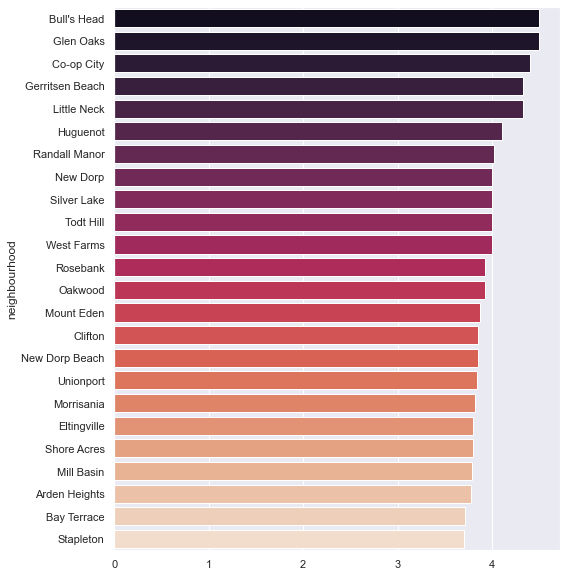

In [29]:
plt.figure(figsize=(8,10))
sns.barplot(x=neighborhood_ratings.values, y=neighborhood_ratings.index, palette='rocket')
plt.show()

<AxesSubplot: xlabel='price', ylabel='Count'>

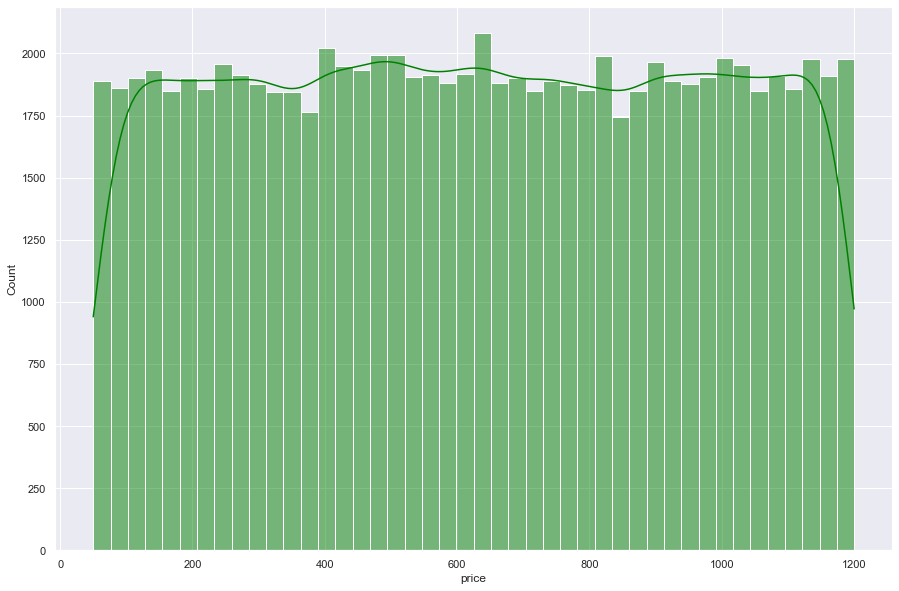

In [30]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.set(font_scale=2)
sns.histplot(data=data, x="price", kde=True, color = "green")

In [31]:
room_type_prices = data.groupby('room type')['price'].median()
fig = px.bar(room_type_prices,
x=room_type_prices.index,
y=room_type_prices.values,
labels={'x': 'Room type', 'y': 'Median price'},
text=['$' + str(int(i)) for i in room_type_prices.values],
title='Median price per room type in USD',
color_discrete_sequence=px.colors.sequential.Bluyl,
template='plotly_dark'
)

fig.update_layout(font=dict(size=16, color='white', family='Avenir'))

fig.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

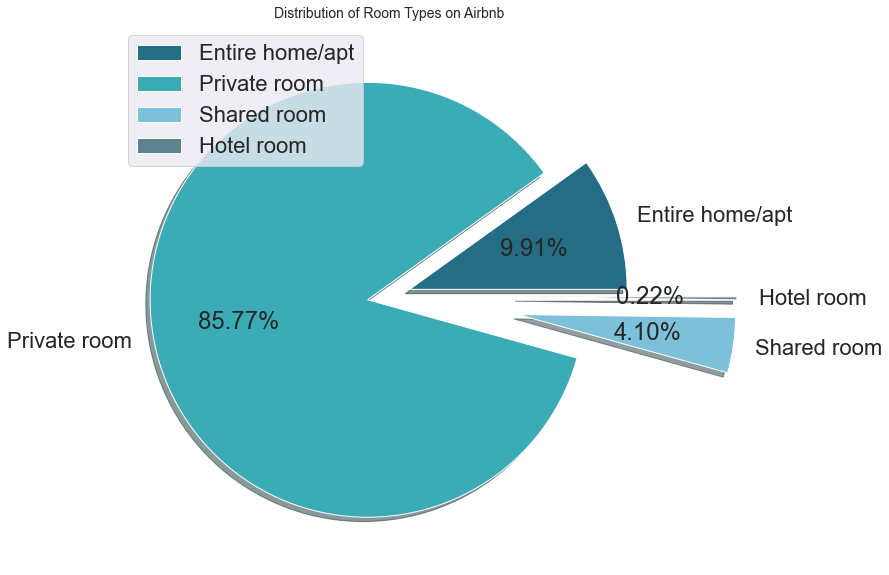

In [32]:
room_type_count = [5269, 45606, 2182, 115]
room_type_labels = ["Entire home/apt", "Private room", "Shared room", "Hotel room"]
explode = [0.1, 0.1, 0.6, 0.6]

fig, ax = plt.subplots(figsize=(10, 10))
ax.pie(room_type_count, labels=room_type_labels, explode=explode, autopct="%1.2f%%", shadow=True, colors=['#256D85', '#3BACB6', '#7cc1d9', '#5d828f'])
ax.legend()
ax.set_title("Distribution of Room Types on Airbnb", fontsize=14)
plt.show()

In [33]:
price_by_construction_year = data.groupby('Construction year')['price'].median().reset_index()
fig = px.bar(price_by_construction_year,
x='Construction year',
y='price',
labels={'x': 'Construction year', 'y': 'Average price'},
text=['$' + str(int(i)) for i in price_by_construction_year['price']],
title='Average price per construction year in USD',
color_discrete_sequence=px.colors.sequential.RdBu,
template='plotly_dark'
)

fig.update_layout(font=dict(size=16, color='white', family='Avenir'))

fig.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

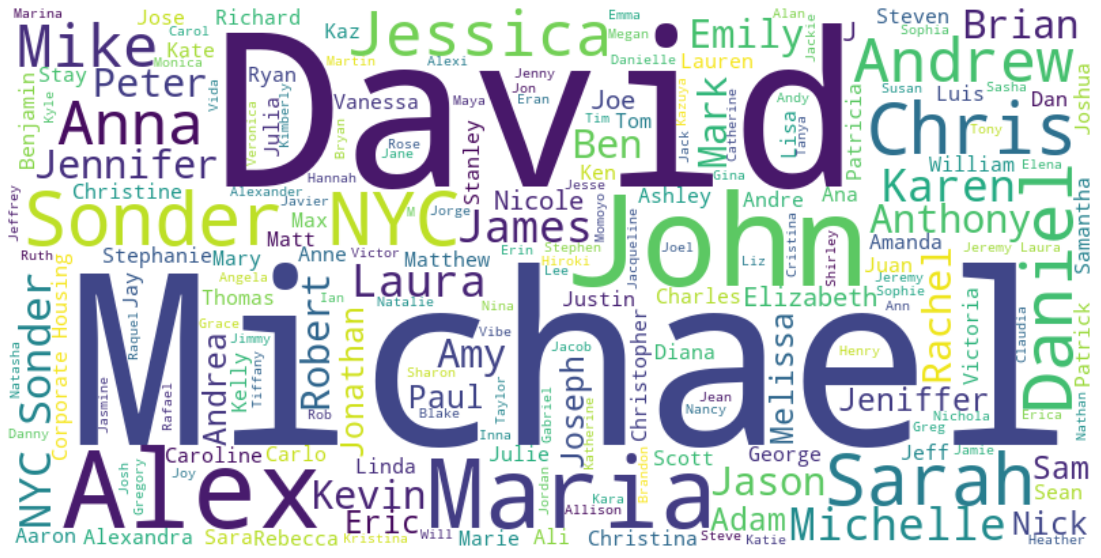

In [34]:
from wordcloud import WordCloud, STOPWORDS

# Concatenate all host names
host_names = ' '.join(data['host name'].dropna().astype(str).tolist())

# Set stopwords (words to exclude from the word cloud)
stopwords = set(STOPWORDS)
stopwords.add('NaN')

# Generate the word cloud
wordcloud = WordCloud(background_color='white', stopwords=stopwords, width=800, height=400).generate(host_names)

# Display the word cloud
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


### d) Machine learning system application

In [35]:
#Label encoding

LE = LabelEncoder()
host_identity_verified_le = LabelEncoder()
data['host_identity_verified'] = host_identity_verified_le.fit_transform(data['host_identity_verified'])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [36]:
LE = LabelEncoder()
instant_bookable_le = LabelEncoder()
data['instant_bookable'] = instant_bookable_le.fit_transform(data['instant_bookable'])
data['instant_bookable'].value_counts()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

0    42144
1    41734
Name: instant_bookable, dtype: int64

In [37]:
LE = LabelEncoder()
room_type_le = LabelEncoder()
data['room type'] = room_type_le.fit_transform(data['room type'])
data['room type'].value_counts()
# Hotel room --> 1 , Private room --> 2 , Entire home/apt --> 0 , Shared room --> 3

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

0    44392
2    37717
3     1660
1      109
Name: room type, dtype: int64

In [38]:
LE = LabelEncoder()
cancellation_policy_le = LabelEncoder()
data['cancellation_policy'] = cancellation_policy_le.fit_transform(data['cancellation_policy'])
data['cancellation_policy'].value_counts()
# moderate --> 1 , strict --> 2 , flexible --> 0

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

1    28106
2    27925
0    27847
Name: cancellation_policy, dtype: int64

In [39]:
LE = LabelEncoder()
neighbourhood_group_le = LabelEncoder()
data['neighbourhood group'] = neighbourhood_group_le.fit_transform(data['neighbourhood group'])
data['neighbourhood group'].value_counts()
# Brooklyn --> 1 , Manhattan --> 2 , Bronx --> 0 , Queens --> 3 , Staten Island --> 4 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

1    34827
2    34755
3    11189
0     2284
4      822
5        1
Name: neighbourhood group, dtype: int64

In [40]:
data2 = data[['host_identity_verified','neighbourhood group','instant_bookable','cancellation_policy','room type','Construction year','minimum nights','number of reviews', 'reviews per month',
       'review rate number', 'calculated host listings count',
       'availability 365','price', 'service fee']]

In [41]:
X =data2.drop(["price"],axis=1).values
y= data2['price'].values

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [43]:
ro_scaler = RobustScaler()
X_train = ro_scaler.fit_transform(X_train)
X_test = ro_scaler.fit_transform(X_test)

<IPython.core.display.Javascript object>

In [44]:
#Lienar regression model

# instantiate the linear regression model
lin_reg = LinearRegression()

# fit the model to the training data
lin_reg.fit(X_train, y_train)

# make predictions on the test data
y_pred = lin_reg.predict(X_test)

# evaluate the model performance
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# print the evaluation metrics
print("MSE:", mse)
print("MAE:", mae)
print("R2 score:", r2)


MSE: 102.43062961620552
MAE: 10.021232226477311
R2 score: 0.9990708038576761


In [45]:
y_pred_LR = lin_reg.predict(X_test)
df = pd.DataFrame({"Y_test": y_test , "Y_pred" : y_pred})
df.head(10)

Y_test       Y_pred
0   318.0   309.987931
1   891.0   879.959317
2   563.0   554.967713
3   373.0   364.993467
4   577.0   564.960135
5  1028.0  1019.944272
6  1164.0  1154.919595
7  1062.0  1049.930108
8  1024.0  1014.928552
9   346.0   334.993860

In [48]:
# Instantiate a random forest regression model
rf = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)

# Fit the model to the training data
rf.fit(X_train, y_train)

# Make predictions on the test data
y_pred_RF = rf.predict(X_test)

# Calculate and print out the evaluation metrics
print('MSE:', mean_squared_error(y_test, y_pred_RF))
print('MAE:', mean_absolute_error(y_test, y_pred_RF))
print('R2 score:', r2_score(y_test, y_pred_RF))

MSE: 101.41802705917821
MAE: 9.94752658020727
R2 score: 0.9990799896490085


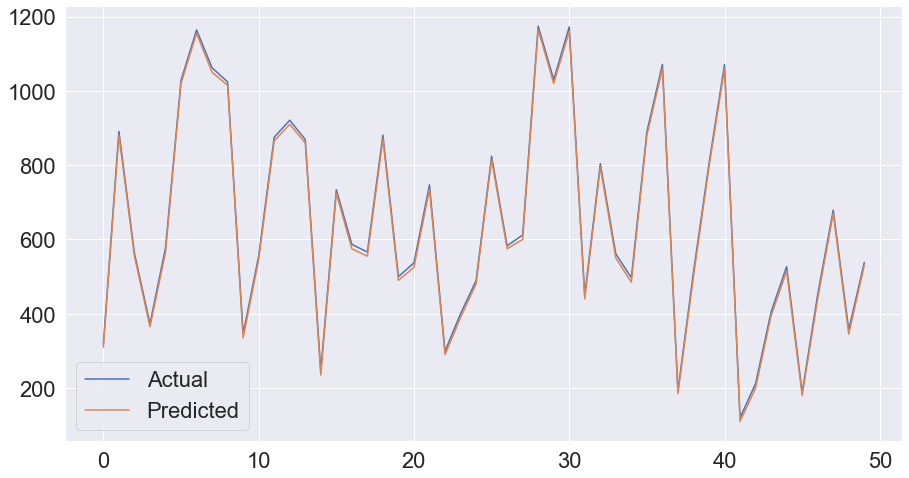

In [47]:
plt.figure(figsize=(15,8))
plt.plot(df[:50])
plt.legend(['Actual' , 'Predicted'])